In [6]:
# How many employees does the company have?
n_employees = 100

# How many days are we calculating the loss?
n_days = 365

# On average how many phishing emails does each employee receive weekly?
n_phishing_emails_per_week = 1

# How many of the phishing emails do employees click?
click_rate = 0.1

# How much money do we expect to lose with each click?
loss_per_click = 1000

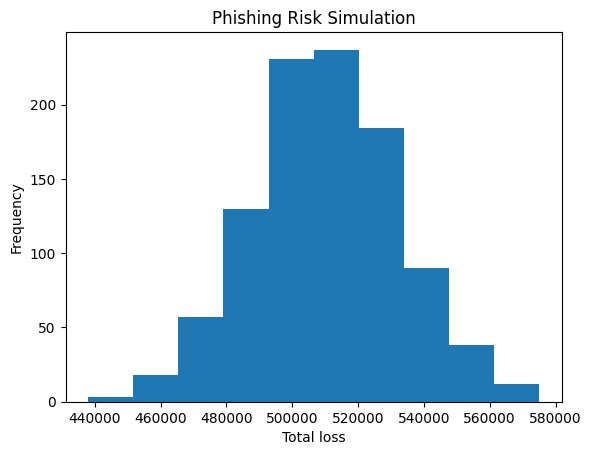

In [8]:
company_loss = company_click_loss(
    n_employees=n_employees,
    n_days=n_days,
    n_phishing_emails_per_week=n_phishing_emails_per_week,
    click_rate=click_rate,
    loss_per_click=loss_per_click,
    n_simulations=1000,
    random_seed=None)

In [9]:
company_loss["company_loss"]

[494000,
 525000,
 502000,
 482000,
 531000,
 524000,
 519000,
 480000,
 494000,
 511000,
 506000,
 494000,
 507000,
 529000,
 505000,
 507000,
 514000,
 498000,
 516000,
 506000,
 497000,
 547000,
 507000,
 469000,
 536000,
 499000,
 547000,
 506000,
 474000,
 542000,
 504000,
 518000,
 520000,
 509000,
 501000,
 499000,
 503000,
 531000,
 545000,
 505000,
 504000,
 477000,
 496000,
 488000,
 507000,
 531000,
 487000,
 539000,
 523000,
 497000,
 513000,
 506000,
 547000,
 512000,
 475000,
 531000,
 476000,
 502000,
 537000,
 515000,
 500000,
 522000,
 521000,
 498000,
 565000,
 495000,
 533000,
 539000,
 511000,
 533000,
 521000,
 479000,
 494000,
 534000,
 531000,
 513000,
 490000,
 480000,
 517000,
 514000,
 511000,
 516000,
 479000,
 507000,
 498000,
 532000,
 537000,
 499000,
 540000,
 466000,
 523000,
 488000,
 488000,
 518000,
 511000,
 520000,
 530000,
 519000,
 521000,
 495000,
 496000,
 531000,
 498000,
 491000,
 504000,
 523000,
 501000,
 487000,
 533000,
 515000,
 574000,
 